#coletar e preparar os dados

In [1]:
#import das libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('pima-data.csv')

In [3]:
df.shape

(768, 10)

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [8]:
#verificar se há valores nulos em quaisquer celula
df.isnull().values.any()

False

In [11]:
#cria função para ver a correlação entre as variáveis
def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

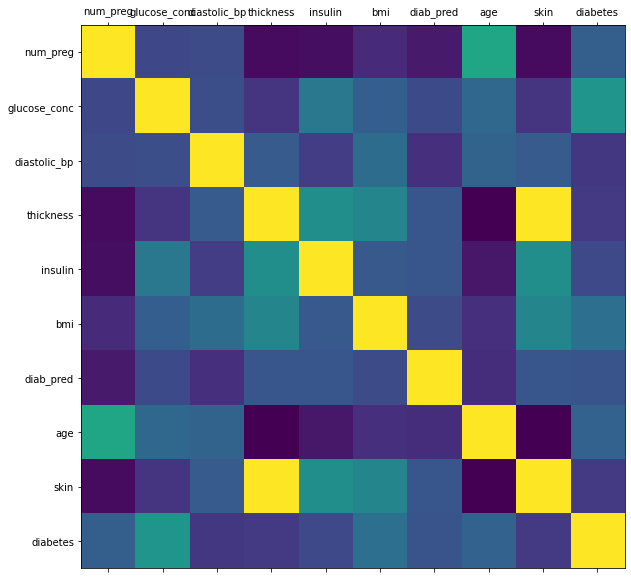

In [12]:
plot_corr(df)

In [14]:
#estudo de cada variável com as outras e assim saber quais as variáveis mais relevantes para construir o modelo
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [15]:
#convertendo e mapeando os strings nas colunas
diabetes_map={True:1, False:0}

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [18]:
#verificando a distribuição dos dados, buscando o equilibrio.
num_true = len(df.loc[df['diabetes']==True])
num_false = len(df.loc[df['diabetes']==False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [19]:
import sklearn as sk

In [20]:
from sklearn.model_selection import train_test_split

Nesse caso há 9 variáveis preditoras e 1 variável target

In [21]:
#variáveis preditoras que serão relacionadas
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [22]:
#variavel target
atrib_prev = ['diabetes']

In [29]:
#criando os objetos que receberão os dados de treinamento
X= df[atributos].values
Y=df[atrib_prev].values

In [30]:
#critério para fazer a divisão dos dados
split_test_size = 0.30

In [33]:
#ddos de treinamento
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size= split_test_size, random_state=101)

VErificando o Split

In [34]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 187 (34.82%)
Training False : 350 (65.18%)

Test True : 81 (35.06%)
Test False : 150 (64.94%)


In [35]:
#nova verificação se ocorre algum valor nulo
df.isnull().values.any()

False

In [36]:
#explorando mais os dados.
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


TRatamento do dados Missing - Input

In [39]:
from sklearn.impute import SimpleImputer

In [41]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

#substituindo os valores zerados pela media dos dados, uma boa estratégia 
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

Agora é o treinamento

In [42]:
#Utilizando o Naive-bayes
from sklearn.naive_bayes import GaussianNB

In [43]:
modelo_v1 = GaussianNB()

In [44]:
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

VErificando a acuracia

In [45]:
from sklearn import metrics

In [51]:
nb_predict_train = modelo_v1.predict(X_treino)
nb_predict_test = modelo_v1.predict(X_teste)

In [47]:
print("Exatidão (Accuracy): {0:4f}".format(metrics.accuracy_score(Y_treino,nb_predict_train)))
print()

Exatidão (Accuracy): 0.756052



In [52]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7576



Criando as matrizes de confusão e analise da metrica

In [53]:
from IPython.display import Image

In [55]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste,nb_predict_test, labels = [1,0])))
print(" ")      

print("Classification Report")
print(metrics.classification_report(Y_teste,nb_predict_test, labels = [1,0]))

Confusion Matrix
[[ 50  31]
 [ 25 125]]
 
Classification Report
              precision    recall  f1-score   support

           1       0.67      0.62      0.64        81
           0       0.80      0.83      0.82       150

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.76      0.76       231



Otimizando o modelo com RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
modelo_v2 = RandomForestClassifier(random_state = 101)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=101)

In [59]:
#verificação dos dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Acurácia:{0:4f}".format(metrics.accuracy_score(Y_treino,rf_predict_train)))

Acurácia:1.000000


In [62]:
rf_predict_test = modelo_v2.predict(X_teste)
print("Acurácia:{0:4f}".format(metrics.accuracy_score(Y_teste,rf_predict_test)))
print(" ")

print("Classification Report")
print(metrics.classification_report(Y_teste,rf_predict_test, labels = [1,0]))

Acurácia:0.792208
 
Classification Report
              precision    recall  f1-score   support

           1       0.71      0.69      0.70        81
           0       0.84      0.85      0.84       150

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



Terinamento com Regressão Logistica

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
modelo_v3 = LogisticRegression(C=0.7, random_state = 101, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [67]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7749

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.59      0.65        81
           0       0.80      0.87      0.83       150

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [68]:
import pickle

fazendo previsões

In [69]:
filename= 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [75]:
#carregando os dados do modelo e fazendo previsão com o novos conjuntos de dados
loaded_model = pickle.load(open(filename,'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1,-1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1,-1))

print(resultado1)
print(resultado2)

[1]
[0]
